# K-Nearest Neighbours



In [105]:
# Edwin Peter
# 177019

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import tensorflow as tf

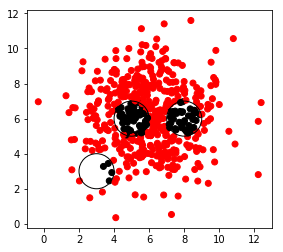

In [121]:
# Getting the data
import matplotlib.patches as patches
import matplotlib.path as path
import math
import tensorflow as tf

num_points = 500
radius = 1
centre1 = (3,3)
centre2 = (5,6)
centre3 = (8,6)

X = np.random.normal(6, 2, [num_points,2])
Y = np.zeros(shape=(len(X),1))

for i,index in zip(X, range(len(X))):
    xcor,ycor = i[0], i[1]
    dist1 = math.sqrt((centre1[0] - xcor) ** 2 + (centre1[1] - ycor) ** 2)
    dist2 = math.sqrt((centre2[0] - xcor) ** 2 + (centre2[1] - ycor) ** 2)
    dist3 = math.sqrt((centre3[0] - xcor) ** 2 + (centre3[1] - ycor) ** 2)
    if (dist1 <= radius or dist2 <= radius or dist3 <= radius):
        Y[index] = 1
        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Circle(centre1, radius, fill= False))
ax1.add_patch(patches.Circle(centre2, 1, fill= False))
ax1.add_patch(patches.Circle(centre3, 1, fill= False))
plt.scatter(X[:,0],X[:,1],color=['black' if i==1 else 'red' for i in Y])
plt.show()

In [108]:
classifier = KNeighborsClassifier(n_neighbors = 5,
                                  metric = 'euclidean')
classifier.fit(X, Y.ravel())
prediction = classifier.predict(X)

In [109]:
cm = confusion_matrix(Y, prediction)
accuracy = accuracy_score(Y, prediction)
print "Confusion Matrix:\n", cm
print "\nAccuracy:{}%".format(accuracy*100)

Confusion Matrix:
[[403   5]
 [  4  88]]

Accuracy:98.2%


# SVM

In [111]:
classifier = SVC(kernel = 'rbf', random_state = 0, C=10)
classifier.fit(X, Y.ravel())
sv = classifier.support_vectors_

prediction = classifier.predict(X)
cm = confusion_matrix(Y, prediction)

acc = np.mean(prediction==Y.T)*100
print "Confusion Matrix:\n", cm
print "\nAccuracy: {}%".format(acc)

Confusion Matrix:
[[408   0]
 [  3  89]]

Accuracy: 99.4%


# Neural Networks

In [147]:
input_size=2
hidden_layers=3
output_size=1
x = tf.placeholder(tf.float32,shape=[None,input_size])
y_ = tf.placeholder(tf.float32,shape=[None,output_size])

W1 = tf.Variable(tf.random_uniform([input_size,hidden_layers]))
b1 = tf.Variable(tf.zeros([hidden_layers]))

W2 = tf.Variable(tf.random_uniform([hidden_layers,output_size]))
b2 = tf.Variable(tf.zeros([output_size]))

hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(x, W1), b1))

y = tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer, W2),b2))

lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2))

learning_rate = 0.1
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()
correct_prediction = tf.equal(tf.round(y),y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(init)

epochs = 5000

for i in range(epochs):
    sess.run(train_step, feed_dict={x: X, y_: Y})
acc = sess.run(accuracy, feed_dict={x: X, y_: Y})*100
print "Neural Network Accuracy: {}%".format(acc)

Neural Network Accuracy: 80.0000011921%
